# Cleaning the Marvels Avengers Dataset

The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new Marvel Cinematic Universe.

Our taskis to clean up the dataset so it can be more useful for analysis in pandas.

In [1]:
# Load our libraries
import pandas as pd
import chardet
import matplotlib.pyplot as plt

In [2]:
# Determining our data encoding
with open("avengers.csv", 'rb') as f:
    result = chardet.detect(f.read())

In [3]:
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7292846143077137, 'language': ''}

In [4]:
# Loading our data with Pandas
avengers = pd.read_csv("avengers.csv", encoding='ISO-8859-1')

In [5]:
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [6]:
avengers.shape

(173, 21)

In [7]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

## Data Cleaning

### Year

<AxesSubplot:>

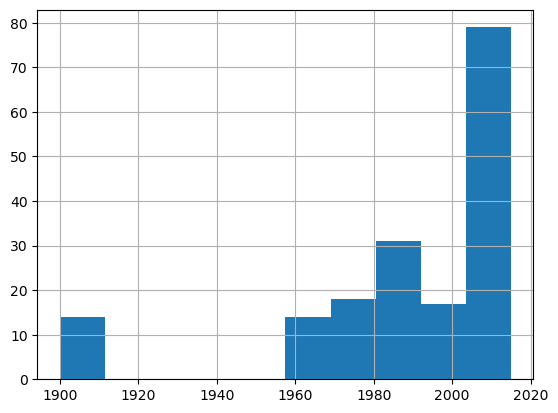

In [8]:
avengers['Year'].hist()

There are years before 1960 which is wrong, as the avengers were introduced in the comic series around 1960

In [9]:
true_avengers = avengers[avengers['Year'] > 1960]

In [10]:
true_avengers.shape

(159, 21)

In [11]:
def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths   

In [12]:
true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

C:\Users\Belema Amah\AppData\Local\Temp\ipykernel_2792\953805682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)


In [13]:
true_avengers['Deaths']

0      1
1      1
2      1
3      1
4      2
      ..
168    0
169    0
170    0
171    0
172    0
Name: Deaths, Length: 159, dtype: int64

**Verify that the Years since joining field accurately reflects the Year column**

In [14]:
joined_accuracy_count = ((2015 - true_avengers['Year']) == (true_avengers['Years since joining'])).sum()

In [15]:
joined_accuracy_count

159

We can clearly see that the Years since joining column has accurate values